In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_csv('HCEPDB/HCEPDB_moldata.csv')

### Read the first 10 rows.

In [3]:
data.head(10)

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1
5,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...
6,196637,C1C=CC=C1c1cc2[se]c3cc4ccsc4cc3c2[se]1,C17H10SSe2,404.2520,2.644436,0.587932,69.223461,-5.187932,2.201106,-2.986827,C1=CC=C(C1)c1cc2[se]c3cc4ccsc4cc3c2[se]1
7,262174,C1C=CC=C1c1cc2[se]c3c4occc4c4cscc4c3c2[se]1,C19H10OSSe2,444.2730,2.523057,0.397670,97.645325,-4.997670,1.982122,-3.015548,C1=CC=C(C1)c1cc2[se]c3c4occc4c4cscc4c3c2[se]1
8,393249,C1C=CC=C1c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12,C24H15NSe,396.3495,3.115895,0.869140,55.174815,-5.469140,2.331815,-3.137325,C1=CC=C(C1)c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12
9,35,C1C2=C([SiH2]C=C2)C=C1c1cc2occc2c2cscc12,C17H12OSSi,292.4328,2.743214,0.387106,109.062905,-4.987106,1.909966,-3.077141,C1=CC2=C([SiH2]1)C=C(C2)c1cc2occc2c2cscc12


### Read the last 10 rows. 

In [4]:
data.tail(10)

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
2322839,1703911,C1cc2c(ccc(-c3cccnc3)c2c1)-c1sc(-c2scc3cc[SiH2...,C26H19NS2Si2,465.7471,4.881051,0.657693,114.218791,-5.257693,1.876279,-3.381414,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322840,1814506,[SiH2]1ccc2csc(c12)-c1sc(-c2sc(c3[SiH2]ccc23)-...,C23H16N2S3Si2,472.7634,3.353182,0.461167,111.904241,-5.061167,1.892000,-3.169167,c1sc(c2[SiH2]ccc12)-c1sc(-c2sc(c3[SiH2]ccc23)-...
2322841,2559314,[SiH2]1ccc2csc(c12)-c1sc(-c2sc(c3[SiH2]ccc23)-...,C23H15NOS3Si2,473.7475,4.263377,0.688326,95.325067,-5.288326,1.998713,-3.289613,c1sc(c2[SiH2]ccc12)-c1sc(-c2sc(c3[SiH2]ccc23)-...
2322842,2351086,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1ccc(...,C24H16N2S3Si2,484.7744,6.662663,0.850060,120.627407,-5.450060,1.839686,-3.610374,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322843,1712111,[SiH2]1ccc2csc(c12)-c1sc(-c2sc(-c3scc4ccsc34)c...,C24H12OS6Si,536.8398,2.951709,0.279912,162.292795,-4.879912,1.615145,-3.264767,c1sc(c2[SiH2]ccc12)-c1sc(-c2sc(-c3scc4ccsc34)c...
2322844,2543603,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1cnc(...,C22H14N4S3Si2,486.7506,0.000000,0.000000,0.000000,-5.632512,1.454082,-4.178430,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1cnc(...
2322845,2304057,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1ccc(...,C22H14N4S3Si2,486.7506,9.335485,1.120744,128.197094,-5.720744,1.798600,-3.922144,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322846,2007035,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1ccc(...,C26H18S3Si2,482.7982,2.498209,0.834995,46.046052,-5.434995,2.433160,-3.001835,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322847,1961981,C1ccc2c1c(sc2-c1scc2cc[SiH2]c12)-c1ccc(cc1)-c1...,C25H16S3SeSi,519.6454,2.679067,0.659243,62.544032,-5.259243,2.258468,-3.000775,c1sc(c2[SiH2]ccc12)-c1sc(c2Cccc12)-c1ccc(cc1)-...
2322848,2754558,[SiH2]1ccc2csc(c12)-c1sc(-c2sc(-c3scc4ccsc34)c...,C24H13NOS5Si,519.7887,1.272400,0.102802,190.489616,-4.702802,1.490950,-3.211851,c1sc(c2[SiH2]ccc12)-c1sc(-c2sc(-c3scc4ccsc34)c...


### Show the number of elements.

In [5]:
data.shape

(2322849, 11)

### Show the column names.

In [6]:
data.columns

Index(['id', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'tmp_smiles_str'],
      dtype='object')

### Make  id  column  the  index.

In [7]:
data.set_index('id').head(5)

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
id,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


### Show  the  data  types  of  each  column.

In [8]:
data.dtypes

id                  int64
SMILES_str         object
stoich_str         object
mass              float64
pce               float64
voc               float64
jsc               float64
e_homo_alpha      float64
e_gap_alpha       float64
e_lumo_alpha      float64
tmp_smiles_str     object
dtype: object

### Start  to  manage  data. 

### Now I try to calculate the standard diviation of the mass.

In [9]:
data['(xi-x)^2'] = (data['mass'] - data['mass'].mean())**2
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,(xi-x)^2
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,451.517873
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,229.539163
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,2711.675432
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,9238.910207
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,1312.196283


In [39]:
SD = math.sqrt(sum(data['(xi-x)^2'])/data.shape[0])
M = data['mass'].mean()
print('SD = ',SD,', mean = ',M)

SD =  59.853157780691824 , mean =  415.564049928


### Group the data by the standard diviation of the mass.

In [55]:
data['mass_group'] = pd.cut(data['mass'],bins=[min(data['mass']),M-3*SD,M-2*SD,M-SD,M+SD,M+2*SD,M+3*SD,max(data['mass'])],labels=["<(-3SD)","-3SD~-2SD","-2SD~-SD","-SD~+SD","+SD~+2SD","+2SD~+3SD",">(+3SD)"])

In [56]:
data

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,(xi-x)^2,mass_group
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,451.517873,-SD~+SD
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,229.539163,-SD~+SD
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,2711.675432,-SD~+SD
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,9238.910207,-2SD~-SD
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,1312.196283,-SD~+SD
5,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...,1509.295311,-SD~+SD
6,196637,C1C=CC=C1c1cc2[se]c3cc4ccsc4cc3c2[se]1,C17H10SSe2,404.2520,2.644436,0.587932,69.223461,-5.187932,2.201106,-2.986827,C1=CC=C(C1)c1cc2[se]c3cc4ccsc4cc3c2[se]1,127.962474,-SD~+SD
7,262174,C1C=CC=C1c1cc2[se]c3c4occc4c4cscc4c3c2[se]1,C19H10OSSe2,444.2730,2.523057,0.397670,97.645325,-4.997670,1.982122,-3.015548,C1=CC=C(C1)c1cc2[se]c3c4occc4c4cscc4c3c2[se]1,824.203814,-SD~+SD
8,393249,C1C=CC=C1c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12,C24H15NSe,396.3495,3.115895,0.869140,55.174815,-5.469140,2.331815,-3.137325,C1=CC=C(C1)c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12,369.198929,-SD~+SD
9,35,C1C2=C([SiH2]C=C2)C=C1c1cc2occc2c2cscc12,C17H12OSSi,292.4328,2.743214,0.387106,109.062905,-4.987106,1.909966,-3.077141,C1=CC2=C([SiH2]1)C=C(C2)c1cc2occc2c2cscc12,15161.304709,-3SD~-2SD


In [57]:
pd.value_counts(data['mass_group'])

-SD~+SD      1603364
-2SD~-SD      323872
+SD~+2SD      290594
-3SD~-2SD      66373
+2SD~+3SD      34290
<(-3SD)         3144
>(+3SD)         1211
Name: mass_group, dtype: int64

### Now I calculate how many data are wihtin 1 standard diviation, 2 standard diviatioa, and 3 standard diviation respectively.

In [58]:
1603364/data.shape[0]

0.690257524272994

In [59]:
(1603364+323872+290594)/data.shape[0]

0.9547887098989215

In [60]:
(1603364+323872+290594+66373+34290)/data.shape[0]

0.998124716673361

### <span style="color:red">Though I didn't know what these data are, I found the mass of these chemicals are nearly normal distribution!

In [61]:
data.groupby(['mass_group'])['voc'].describe()

mass_group       
<(-3SD)     count    3.144000e+03
            mean     6.219819e-01
            std      4.210254e-01
            min      0.000000e+00
            25%      2.923413e-01
            50%      5.870970e-01
            75%      8.999475e-01
            max      2.178957e+00
-3SD~-2SD   count    6.637300e+04
            mean     6.665345e-01
            std      3.581035e-01
            min      0.000000e+00
            25%      4.086398e-01
            50%      6.538720e-01
            75%      9.035142e-01
            max      2.135583e+00
-2SD~-SD    count    3.238720e+05
            mean     6.320939e-01
            std      3.352676e-01
            min      0.000000e+00
            25%      3.982995e-01
            50%      6.221896e-01
            75%      8.524997e-01
            max      2.103816e+00
-SD~+SD     count    1.603364e+06
            mean     5.465694e-01
            std      2.958476e-01
            min      0.000000e+00
            25%      3.423544e

### Get a plot voc v.s. grouped data

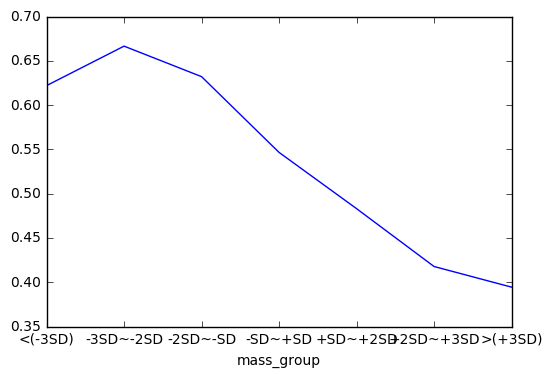

In [62]:
data.groupby(['mass_group'])['voc'].mean().plot()

### Get another plot. 

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 19.5,  19.6,  19.7,  19.8,  19.9,  20. ,  20.1,  20.2,  20.3,
         20.4,  20.5]),
 <a list of 10 Patch objects>)

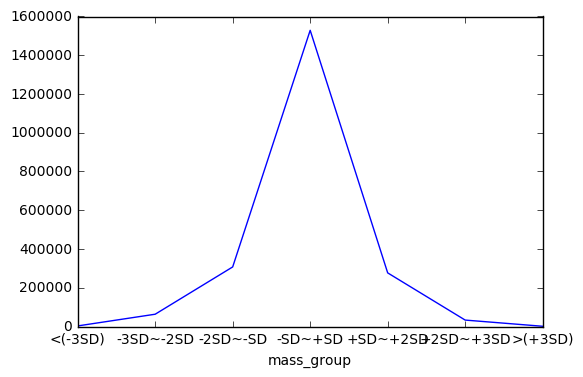

In [72]:
data.groupby(['mass_group'])['tmp_smiles_str'].count().plot().hist(20)

### I found the distribution of the amount of 'tmp_smiles_str' is as same as what I got from doing 'mass', nearly normal distribution.